In [1]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
gender_file = "WHO Data Repo Suicide rate estimates age-standardized.csv"
sr_by_gender = pd.read_csv(gender_file)
#sr_by_gender.head()

In [3]:
sr_by_gender = sr_by_gender.rename(columns = {"2016_Age-standardized suicide rates (per 100 000 population)" : "2016",
                                                 "2015_Age-standardized suicide rates (per 100 000 population)" : "2015",
                                                 "2010_Age-standardized suicide rates (per 100 000 population)" : "2010",
                                                 "2000_Age-standardized suicide rates (per 100 000 population)" : "2000"})

sr_by_gender.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [4]:
sr_male = sr_by_gender[sr_by_gender['Sex']==' Male']
sr_male.head()

,Country,Sex,2016,2015,2010,2000
1,Afghanistan,Male,10.6,10.9,12.5,14.3
4,Albania,Male,7.0,6.7,9.5,8.2
7,Algeria,Male,4.9,5.0,5.1,6.7
10,Angola,Male,14.0,14.8,16.7,21.9
13,Antigua and Barbuda,Male,0.0,0.0,0.5,4.3


In [5]:
sr_female = sr_by_gender[sr_by_gender['Sex']==' Female']
sr_female.head()

,Country,Sex,2016,2015,2010,2000
2,Afghanistan,Female,2.1,2.1,2.1,1.7
5,Albania,Female,4.3,4.0,6.0,3.6
8,Algeria,Female,1.8,1.8,1.9,2.8
11,Angola,Female,4.6,4.7,5.1,7.2
14,Antigua and Barbuda,Female,0.9,1.6,0.0,0.1


In [6]:
sr_dualsex = sr_by_gender[sr_by_gender['Sex']==' Both sexes']
sr_dualsex.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
3,Albania,Both sexes,5.6,5.3,7.7,5.8
6,Algeria,Both sexes,3.3,3.4,3.5,4.7
9,Angola,Both sexes,8.9,9.3,10.4,13.9
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1


## Suicide Data 2015

In [7]:
male_df = sr_male.drop(["Sex","2016"], axis=1)
male_df_2015 = male_df.sort_values(by=['2015'], ascending = False)
top_10_sr_male_2015 = male_df_2015.head(10)
#top_10_sr_male = top_10_sr_male.drop(["Sex","2016"], axis=1)
top_10_sr_male_2015

,Country,2015,2010,2000
289,Lithuania,51.5,56.4,81.7
403,Russian Federation,49.9,62.3,85.8
211,Guyana,46.6,44.9,41.2
256,Kazakhstan,44.2,56.1,63.1
43,Belarus,39.2,58.1,70.4
466,Suriname,38.0,43.7,41.5
511,Ukraine,35.2,41.5,58.1
118,Côte d'Ivoire,31.9,29.1,23.1
157,Equatorial Guinea,31.5,33.0,33.5
394,Republic of Korea,31.4,39.3,20.8


In [8]:
female_df = sr_female.drop(["Sex","2016"], axis=1)
female_df_2015 = female_df.sort_values(by=['2015'], ascending = False)
top_10_sr_female_2015 = female_df_2015.head(10)
top_10_sr_female_2015

,Country,2015,2010,2000
281,Lesotho,32.1,31.0,30.2
509,Uganda,19.2,22.0,23.9
359,Nigeria,17.6,20.1,20.6
227,India,14.7,15.1,16.1
212,Guyana,14.3,14.1,12.8
98,Chad,14.2,15.9,14.5
434,Sierra Leone,13.9,14.3,16.6
119,Côte d'Ivoire,12.9,11.4,9.1
284,Liberia,12.6,12.7,9.5
395,Republic of Korea,12.5,18.7,8.5


In [9]:
dualsex_df = sr_dualsex.drop(["Sex","2016"], axis=1)
dualsex_df_2015 = dualsex_df.sort_values(by=['2015'], ascending = False)
top_10_sr_dualsex_2015 = dualsex_df_2015.head(10)
top_10_sr_dualsex_2015

,Country,2015,2010,2000
210,Guyana,30.3,29.3,26.7
288,Lithuania,28.8,31.3,46.3
279,Lesotho,28.5,27.6,26.8
402,Russian Federation,27.5,34.5,47.5
255,Kazakhstan,25.2,32.0,34.9
465,Suriname,24.4,28.3,26.4
117,Côte d'Ivoire,22.8,20.7,16.5
156,Equatorial Guinea,22.0,22.2,21.2
393,Republic of Korea,21.4,28.1,14.2
42,Belarus,21.2,31.9,38.7


## Suicide Rate Pie Plots 2015

C:\Users\sjbbh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


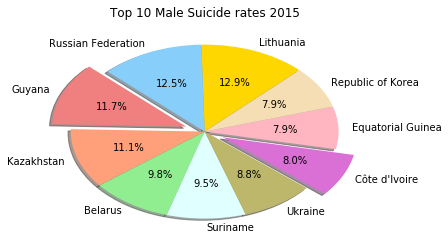

In [10]:
male_sr_size = list(top_10_sr_male_2015["2015"])
labels = list (top_10_sr_male_2015["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0.15, 0, 0, 0, 0, 0.15, 0, 0]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2015", bbox_inches = 'tight')

# Show Figure
plt.show()

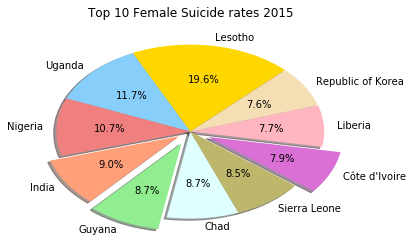

In [11]:
female_sr_size = list(top_10_sr_female_2015["2015"])
labels = list (top_10_sr_female_2015["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0.1, 0.15, 0, 0, 0.15, 0, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2015", bbox_inches = 'tight')

# Show Figure
plt.show()

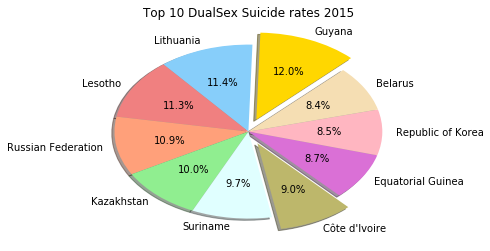

In [12]:
dualsex_sr_size = list(top_10_sr_dualsex_2015["2015"])
labels = list (top_10_sr_dualsex_2015["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0.15, 0, 0, 0, 0, 0, 0.15, 0, 0, 0]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2015")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2015", bbox_inches = 'tight')

# Show Figure
plt.show()

## Suicide Data 2010

In [13]:
male_df_2010 = male_df.sort_values(by=['2010'], ascending = False)
top_10_sr_male_2010 = male_df_2010.head(10)
top_10_sr_male_2010

,Country,2015,2010,2000
403,Russian Federation,49.9,62.3,85.8
43,Belarus,39.2,58.1,70.4
289,Lithuania,51.5,56.4,81.7
256,Kazakhstan,44.2,56.1,63.1
211,Guyana,46.6,44.9,41.2
466,Suriname,38.0,43.7,41.5
511,Ukraine,35.2,41.5,58.1
394,Republic of Korea,31.4,39.3,20.8
274,Latvia,30.9,35.8,54.3
220,Hungary,24.3,33.2,43.9


In [14]:
female_df_2010 = female_df.sort_values(by=['2010'], ascending = False)
top_10_sr_female_2010 = female_df_2010.head(10)
top_10_sr_female_2010

,Country,2015,2010,2000
281,Lesotho,32.1,31.0,30.2
509,Uganda,19.2,22.0,23.9
359,Nigeria,17.6,20.1,20.6
395,Republic of Korea,12.5,18.7,8.5
98,Chad,14.2,15.9,14.5
227,India,14.7,15.1,16.1
434,Sierra Leone,13.9,14.3,16.6
212,Guyana,14.3,14.1,12.8
467,Suriname,11.4,13.3,11.6
284,Liberia,12.6,12.7,9.5


In [15]:
dualsex_df_2010 = dualsex_df.sort_values(by=['2010'], ascending = False)
top_10_sr_dualsex_2010 = dualsex_df_2010.head(10)
top_10_sr_dualsex_2010

,Country,2015,2010,2000
402,Russian Federation,27.5,34.5,47.5
255,Kazakhstan,25.2,32.0,34.9
42,Belarus,21.2,31.9,38.7
288,Lithuania,28.8,31.3,46.3
210,Guyana,30.3,29.3,26.7
465,Suriname,24.4,28.3,26.4
393,Republic of Korea,21.4,28.1,14.2
279,Lesotho,28.5,27.6,26.8
510,Ukraine,19.0,22.6,32.0
156,Equatorial Guinea,22.0,22.2,21.2


## Suicide Rate Pie Plots 2010

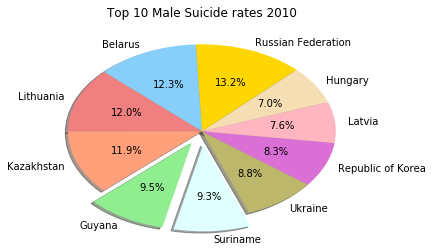

In [16]:
male_sr_size = list(top_10_sr_male_2010["2010"])
labels = list (top_10_sr_male_2010["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0.15, 0.15, 0, 0, 0, 0]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2010", bbox_inches = 'tight')

# Show Figure
plt.show()

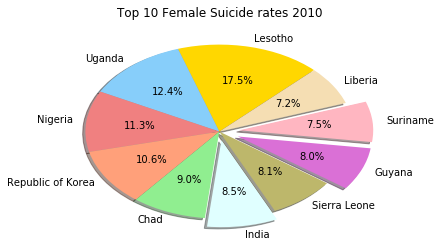

In [17]:
female_sr_size = list(top_10_sr_female_2010["2010"])
labels = list (top_10_sr_female_2010["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0, 0.1, 0, 0.15, 0.15, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2010", bbox_inches = 'tight')

# Show Figure
plt.show()

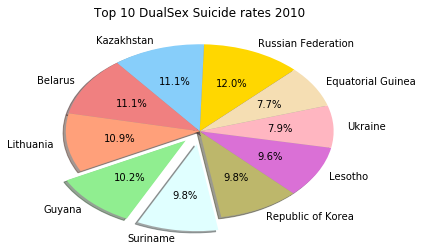

In [18]:
dualsex_sr_size = list(top_10_sr_dualsex_2010["2010"])
labels = list (top_10_sr_dualsex_2010["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0.15, 0.15, 0, 0, 0, 0]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2010")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2010", bbox_inches = 'tight')

# Show Figure
plt.show()

## Suicide Data 2000

In [19]:
male_df_2000 = male_df.sort_values(by=['2000'], ascending = False)
top_10_sr_male_2000 = male_df_2000.head(10)
top_10_sr_male_2000

,Country,2015,2010,2000
403,Russian Federation,49.9,62.3,85.8
289,Lithuania,51.5,56.4,81.7
43,Belarus,39.2,58.1,70.4
256,Kazakhstan,44.2,56.1,63.1
511,Ukraine,35.2,41.5,58.1
274,Latvia,30.9,35.8,54.3
460,Sri Lanka,24.0,31.2,47.8
220,Hungary,24.3,33.2,43.9
163,Estonia,23.9,26.6,43.8
466,Suriname,38.0,43.7,41.5


In [20]:
female_df_2000 = female_df.sort_values(by=['2000'], ascending = False)
top_10_sr_female_2000 = female_df_2000.head(10)
top_10_sr_female_2000

,Country,2015,2010,2000
281,Lesotho,32.1,31.0,30.2
509,Uganda,19.2,22.0,23.9
359,Nigeria,17.6,20.1,20.6
407,Rwanda,6.2,7.2,19.4
434,Sierra Leone,13.9,14.3,16.6
227,India,14.7,15.1,16.1
290,Lithuania,8.9,9.5,15.6
104,China,8.5,11.0,15.6
344,Nepal,8.5,11.0,15.5
89,Cameroon,12.4,11.9,14.6


In [21]:
dualsex_df_2000 = dualsex_df.sort_values(by=['2000'], ascending = False)
top_10_sr_dualsex_2000 = dualsex_df_2000.head(10)
top_10_sr_dualsex_2000

,Country,2015,2010,2000
402,Russian Federation,27.5,34.5,47.5
288,Lithuania,28.8,31.3,46.3
42,Belarus,21.2,31.9,38.7
255,Kazakhstan,25.2,32.0,34.9
510,Ukraine,19.0,22.6,32.0
459,Sri Lanka,14.5,19.2,30.3
273,Latvia,17.3,18.8,29.7
279,Lesotho,28.5,27.6,26.8
210,Guyana,30.3,29.3,26.7
465,Suriname,24.4,28.3,26.4


## Suicide Rate Pie Plots 2000

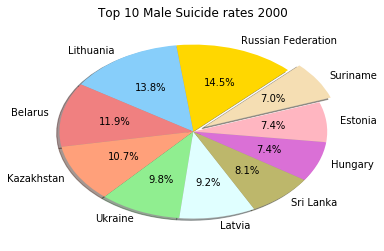

In [22]:
male_sr_size = list(top_10_sr_male_2000["2000"])
labels = list (top_10_sr_male_2000["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
plt.pie (male_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Male Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 Male_SuicideRate_2000", bbox_inches = 'tight')

# Show Figure
plt.show()

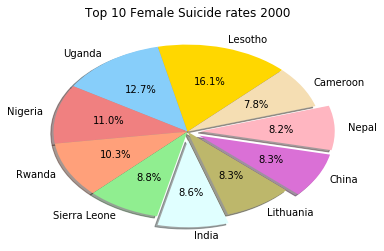

In [23]:
female_sr_size = list(top_10_sr_female_2000["2000"])
labels = list (top_10_sr_female_2000["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.1, 0]
plt.pie (female_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 Female Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 Female_SuicideRate_2000", bbox_inches = 'tight')

# Show Figure
plt.show()

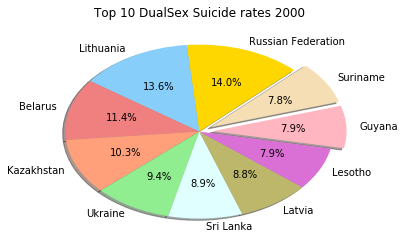

In [24]:
dualsex_sr_size = list(top_10_sr_dualsex_2000["2000"])
labels = list (top_10_sr_dualsex_2000["Country"])
pie_colors = ['gold', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightgreen', 
              'lightcyan', 'darkkhaki', 'orchid', 'lightpink', 'wheat']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1]
plt.pie (dualsex_sr_size,labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 45, colors = pie_colors)
#plt.axis("equal")
plt.axes().set_aspect('auto', anchor = 'C', adjustable = 'datalim')
plt.title ("Top 10 DualSex Suicide rates 2000")
# Save Figure
plt.savefig("Plots/Top 10 DualSex Suicide rates 2000", bbox_inches = 'tight')

# Show Figure
plt.show()